# APODE

Este documento muestra la funcionalidad actual del paquete apode. El mismo provee una clase que hereda (pendiente) de la clase DataFrame.

Esta clase dispone de varios métodos que calculan medidas y generan gráficos en los siguuinetes temas:

* Pobreza
* Desigualdad
* Bienestar
* Polarización
* Concentración

Otros temas serán agregados más adelante.

Al momento los algoritmos no han sido testeados y es escasa la documentación. 


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from apode import IneqMeasure # clase
from apode import distribution_examples,joinpar # test

# Generar datos

* Los datos pueden generarse manualmente o mediante simuación. Estan contenidos en un DataFrame
* Los datos pueden estar agrupados. En este caso una variable contiene las frecuencias.
* Pueden existir otras variables categóricas que permiten aplicar los indicadores por grupos (groupby)
* Un parámetros indica si los datos están ordenados (por defecto no)


## Carga manual

Se puede crear objeto desde un DataFrame o desde un argumento válido de la funcion DataFrame. La función *binning* se puede usar para agrupar datos.

In [3]:
# dr1a y dr1b son equivalentes
x = [23, 10, 12, 21, 4, 8, 19, 15, 11, 9]
dr1a = IneqMeasure(x) 

df1 = pd.DataFrame({'x':x})
dr1b = IneqMeasure(df1) 

## Lectura desde la web

Falta de implementar. 

## Simulación 

La función *distribution_examples* brinda algunos ejemplos de distribuciones usuales para modelar la distribución del ingreso.

Se generan dos objetos (datos agrupados y no agrupados) que serán utilizados más adelante para mostrar la aplicación de diferentes medidas (muchos de las medidas aún no estan implementadas para datos agrupados).

### Datos no agregados

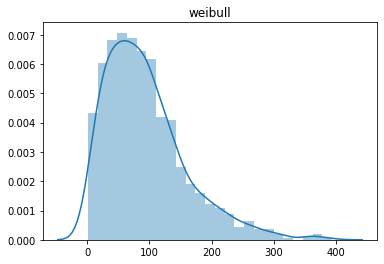

In [4]:
# Generar datos
n = 1000 # observaciones
j_d = 6  # elegir distribción
listd = ['uniform','lognormal','exponential','pareto','chisquare','gamma','weibull']
fdistr = listd[j_d]
df2 = distribution_examples(fdistr,n)

# Crear objeto (sin agrupamiento)
dr2 = IneqMeasure(df2) 

# Graficar distribución
sns.distplot(df2).set_title(fdistr)
plt.show()

### Datos agregados

In [5]:
# Generar datos con agrupamiento
nbins = 10 # maximo, se descartan NAN
df3 = distribution_examples(fdistr,n,nbins)

# Crear objeto
dr3 = IneqMeasure(df3,varx = 'x',weight='weight')  

df3

,weight,x
0,227,22.779185
1,293,60.124881
2,212,97.720530
3,135,136.913947
4,63,175.519930
5,41,215.155125
6,16,248.632630
7,11,291.817267
8,1,336.448536
9,1,393.714140


# Poverty

EStán implementados 11 medidas de pobreza y la curva TIP (permite comparar gráficamente la pobreza entre distribuciones)

In [6]:
pline = 50 # Poverty line
# Evaluar un método - datos sin agrupar
p = dr2.poverty('fgt0',pline)
p

0.28

In [7]:
# Evaluar un método - datos agrupados
p = dr3.poverty('fgt0',pline)
p

0.227

In [8]:
# Evaluar un listado de métodos
mlist_p = ['fgt0','fgt1','fgt2',['fgt',1.5],'sen','sst','watts',['cuh',0],['cuh',0.5],'takayama','kakwani','thon',['bd',2],'hagenaars',['chakravarty',0.5 ]]
mlist_p2 = [joinpar(x,pline) for x in mlist_p ]
table = []
for elem in mlist_p2:   
    table.append(dr2.poverty(elem[0],*elem[1:]))
df_outp =  pd.DataFrame(mlist_p2,columns = ['method','pline','par'])  
df_outp['poverty_measure'] = table
df_outp

D:\EquipoDrive\Cursos Tomados\Diseño de software - FAMAF\apode2020\apode\poverty.py:76: RuntimeWarning: overflow encountered in int_scalars
  p = (q/(n*pline*a))*u


,method,pline,par,poverty_measure
0,fgt0,50,NaN,0.280000
1,fgt1,50,NaN,0.123963
2,fgt2,50,NaN,0.074435
3,fgt,50,1.5,0.093826
4,sen,50,NaN,0.165390
5,sst,50,NaN,0.043925
6,watts,50,NaN,0.215153
7,cuh,50,0.0,0.199133
8,cuh,50,0.5,0.151399
9,takayama,50,NaN,0.113481


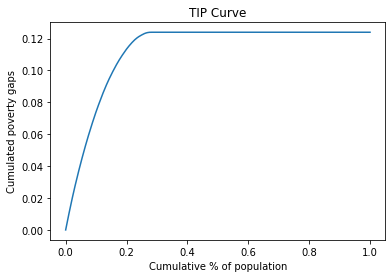

In [9]:
# Curva TIP
df_tip = dr2.tip(pline)

# Inequality

Están implementadas 12 medidas de desigualdad y la Curva de Lorenz (permite comparar gráficamente la desigualdad entre distribuciones)

In [10]:
# Evaluar un método - datos sin agrupar
q = dr2.ineq('gini')
q

0.37336840083953776

In [11]:
# Evaluar un método - datos agrupados
q = dr3.ineq('rr')
q

4.13136931137181

In [12]:
# Evaluar una lista de métodos
list_i = ['rr','dmr','cv','dslog','gini','merhan','piesch','bonferroni',['kolm',0.5],['ratio',0.05],['ratio',0.2], \
          ['entropy',0],['entropy',1],['entropy',2],['atkinson',0.5],['atkinson',1],['atkinson',2]]
list_i = [[elem] if not isinstance(elem,list) else elem for elem in list_i]
table = []
for elem in list_i:   
    table.append(dr2.ineq(*elem))
dz_i =  pd.DataFrame(list_i,columns = ['method','par'])  
dz_i['ineq_measure'] = table
dz_i

,method,par,ineq_measure
0,rr,NaN,4.190042
1,dmr,NaN,0.267542
2,cv,NaN,0.699532
3,dslog,NaN,0.920803
4,gini,NaN,0.373368
5,merhan,NaN,0.521567
6,piesch,NaN,0.299272
7,bonferroni,NaN,0.519523
8,kolm,0.50,82.761199
9,ratio,0.05,0.028309


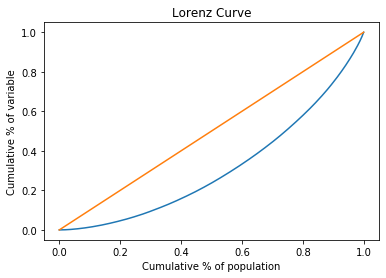

In [13]:
# Curva de Lorenz
df_lor = dr2.lorenz()

# Welfare

Están implementadas 5 funciones de bienestar social.

In [14]:
# Evaluar un método - datos sin agrupar
w = dr2.welfare('sen')
w

58.71267654908107

In [15]:
# Evaluar un método - datos agrupados
w = dr3.welfare('utilitarian')
w

89.78499069611702

In [16]:
# Lista de indicadores
list_w = ['utilitarian','rawlsian','sen','theill','theilt',['isoelastic',0],['isoelastic',1],['isoelastic',2],['isoelastic',np.Inf]]
list_w = [[elem] if not isinstance(elem,list) else elem for elem in list_w]
table = []
for elem in list_w:   
    table.append(dr2.welfare(*elem))
dz_w =  pd.DataFrame(list_w,columns = ['method','par'])  
dz_w['welfare_measure'] = table
dz_w     

,method,par,welfare_measure
0,utilitarian,NaN,93.695086
1,rawlsian,NaN,1.112989
2,sen,NaN,58.712677
3,theill,NaN,69.876280
4,theilt,NaN,74.275522
5,isoelastic,0.0,93.695086
6,isoelastic,1.0,4.246726
7,isoelastic,2.0,-0.024987
8,isoelastic,inf,1.112989


# Polarization 

Están implementados 2 medidas de polarización.

In [17]:
# Evaluar un método - datos sin agrupar
p = dr2.polar('er')
p

0.0703395998697128

In [18]:
# lista de indicadores
list_pz = ['er','wlf']
table = []
for elem in list_pz:   
    table.append(dr2.polar(elem))
dz_pz =  pd.DataFrame(list_pz,columns = ['method'])  
dz_pz['polarization_measure'] = table
dz_pz

,method,polarization_measure
0,er,0.070340
1,wlf,-0.126431


# Concentration

Están implementadas 4 medidas de concentración (de uso comun para analizar la concentración industrial).

In [19]:
# Evaluar un método - datos sin agrupar
c = dr2.conc('hhi')
c

0.001489344687416868

In [20]:
# lista de indicadores
list_c = ['hhi','hhin','rosenbluth',['cr',1],['cr',5]]
list_c = [[elem] if not isinstance(elem,list) else elem for elem in list_c]
table = []
for elem in list_c:   
    table.append(dr2.conc(*elem))
dz_c =  pd.DataFrame(list_c,columns = ['method','par'])  
dz_c['concentration_measure'] = table
dz_c     

,method,par,concentration_measure
0,hhi,NaN,0.001489
1,hhin,NaN,0.000490
2,rosenbluth,NaN,0.001596
3,cr,1.0,0.004202
4,cr,5.0,0.019779


# Pendiente


**En algoritmos falta (implementación):**

* valores no válidos (x y w, parámetros)
* Tamaño nulo del dataframe
* Division por cero (/log(1))
* overflow
* Tratamiento de missings
* implementación eficiente (algunos son lentos: polarizacion)
* mejorar algunos nombres
* Hay metodos que tienen varios nombres o que pueden estar en diferentes categorías. Ver si agregar redundancia.
* Curva de lorenz generalizada
* random (cambiar generador)


**En algoritmos (análisis):**

* Intervalos de confianza
* comparación de distribuciones (impacto de políticas, etc)
* descomposición (basarse en groupby)


**En test:**

* Comparar resultados con librerias de R

# Otras Implementaciones

Relevantes para el dearrollo de los test.

**Python**

- http://www.poorcity.richcity.org/oei/  (algoritmos)
- https://github.com/mmngreco/IneqPy
- https://pythonhosted.org/IneqPy/ineqpy.html
- https://github.com/open-risk/concentrationMetrics

**R**

- https://cran.r-project.org/web/packages/ineq/ineq.pdf
- https://cran.r-project.org/web/packages/affluenceIndex/affluenceIndex.pdf
- https://cran.r-project.org/web/packages/dineq/dineq.pdf
- https://github.com/PABalland/EconGeo
- https://cran.r-project.org/web/packages/rtip/rtip.pdf

**Stata**

- https://www.stata.com/manuals/rinequality.pdf
- http://dasp.ecn.ulaval.ca/dmodules/madds20.htm


# Referencias

* F A Cowell: Measuring Inequality, 1995 Prentice Hall
* Handbook on Poverty and Inequality. https://openknowledge.worldbank.org/bitstream/handle/10986/11985/9780821376133.pdf
* POBREZA Y DESIGUALDAD EN AMÉRICA LATINA. https://www.cedlas.econo.unlp.edu.ar/wp/wp-content/uploads/Pobreza_desigualdad_-America_Latina.pdf
* https://www.cepal.org/es/publicaciones/4740-enfoques-la-medicion-la-pobreza-breve-revision-la-literatura
* https://www.cepal.org/es/publicaciones/4788-consideraciones-indice-gini-medir-la-concentracion-ingreso


